## Введение в Машинное Обучение. 

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 19.04.2022

Дедлайн: 05.05.2022 11:59 (то есть дедлайн в 12 дня!!!!!)

### О задании

Задание состоит из 5 частей, которые между собой связаны. В рамках этой работы вы столкнетесь с табличными данными, работа с которыми реализуется через библиотеку pandas. Поработаете с различными моделями машинного обучения, которые в своем большинстве берутся из библиотеки sklearn. Займетесь предобработкой текстовых данных и даже зашлете свои предсказания на платформу Kaggle.

[ссылочка на связанный контест с дз](https://www.kaggle.com/competitions/hse-intro-ds-2022-hw1/overview)

Так что в рамках этого дз вам придется зарегаться на платформе [kaggle](https://www.kaggle.com). Конкретно этот процесс мы рекомендуем начать как можно раньше, т.к. процесс регистрации там может затянуться на некоторое время из-за необходимости подтвердить номер телефона. Но если что, мы готовы разместить данные для дз в тг-чате.

Данные для домашнего задания расположены там же в контесте. Он также имеет четкий дедлайн, до которого вы можете заслать туда посылки (синхронизирован с дедлайном по дз).

Для доступа к данным и лидерборду в контесте необходимо принять его правила. С ними все просто

### Формат сдачи

Оформленный юпитер ноутбук отправляете на почту: `Anshtein99@mail.ru`

В теме письма указать (x - номер группы): 2022_fikl_ml_dz1_Surname_Name

Файл должен именоваться так: dz1_Surname_Name.ipynb

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

**Дисклеймер!!!!** не удаляйте, пожалуйста, поле id из ваших данных, ни из тестовых, ни из учебных. Иначе вашы шансы сдать свои сабмишшины в систему будут стремиться к 0

UPD. Пару полезных ссылок по работе с pandas, чтобы как то заменить вам курс молодго бойца:

[Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)

[Старая добрая документация](http://pandas.pydata.org/pandas-docs/stable/index.html)

[Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и sklearn. Ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

## 0. Закачка данных

Здесь можете попробовать скачать данные к домашке через kaggle-api, который будет работать после регистрации вашего акка на сайте (а это вам все равно придеться сделать :) )

Ссылочка на гит по работе с апи: [тык](https://github.com/Kaggle/kaggle-api)

Сам код, который вам скачает и разархивирует данные ниже, от вас только требуется поработать с логином или токеном)

In [1]:
#! pip install --user kaggle

In [2]:
! kaggle competitions download -c hse-intro-ds-2022-hw1

import zipfile
z = zipfile.ZipFile('hse-intro-ds-2022-hw1.zip', 'r')
z.extract('train.csv')
z.extract('test.csv')
z.extract('sample_submission.csv')
z.close()

hse-intro-ds-2022-hw1.zip: Skipping, found more recently modified local copy (use --force to force download)


## 1. Разведка (2 балла)

В этом блоке рассмотрим анализ данных, построим графички и сделаем пару выводов из всего этого:

In [3]:
import numpy as np
import pandas as pd
import re

In [4]:
data = pd.read_csv("train.csv")

Также предварительно разобьем датасет на 2 подмножества по гендерам. Это нам пригодится в дальнейшем анализе:

In [5]:
males = data.loc[data['target'] == 1.0]
females = data.loc[data['target'] == 0.0]

**Задание 1.1** (0.5 балла) В рамках этого блока считайте наш файл `train.csv` и прогоните его через пару команд библиотеке `pandas`, а именно:
* Исследуйте трейн на кол-во пропусков в данных:
* Обработайте корректно пропуски: там где это возможно, допишите данные, там где это невозможно - удалите. Напишите пару выводов об этом
* Сделайте пару выводов о природе этих пропусков, что с ними вообще рекомендуется делать?

In [6]:
## здесь и далее напишите код, где вы исследуете пропуски в данных и как-то их преобразовываете
data.describe(include='all')  # посмотреть шо тут есть

,Id,surname,name,patronymic,target
count,5.917177e+06,5917166,5917125,5914478,5.917169e+06
unique,NaN,375152,43835,78392,NaN
top,NaN,ИВАНОВА,АЛЕКСАНДР,АЛЕКСАНДРОВНА,NaN
freq,NaN,23079,257696,295265,NaN
mean,3.114239e+06,NaN,NaN,NaN,4.372273e-01
std,1.798065e+06,NaN,NaN,NaN,4.960440e-01
min,0.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,1.556910e+06,NaN,NaN,NaN,0.000000e+00
50%,3.114242e+06,NaN,NaN,NaN,0.000000e+00
75%,4.671429e+06,NaN,NaN,NaN,1.000000e+00


In [7]:
pd.isnull(data).sum() # кол-во пропусков в данных

Id               0
surname         11
name            52
patronymic    2699
target           8
dtype: int64

Пропуски есть в surname, name, patronymic, target. Попробуем их заполнить

In [8]:
# посмотрим, что за 8 строк, где пола нет и увидим, что пола тут быть не может..
data.loc[data['target'].isnull()]

,Id,surname,name,patronymic,target
749245,1665280,1900304,МАЛАХОВКА,УЛ.КАЛИНИ,NaN
755005,1654031,ЗАО ПРЕДПРИЯТИЕ ИТИ,ПО ПОСТ.ИНФ.,ТЕХНО,NaN
2254715,1752987,УПРАВЛЕНИЕ ПО ДЕЛАМ,МОЛОДЕЖИ,КУЛЬТУРЫ,NaN
2551660,1654029,АООТЭЛЕКТРОСВЯЗЬ,О,/З-Й УЗЕЛ ЭЛЕКТРОСВЯ,NaN
3313534,1665290,1900163,ЛЮБЕРЦЫ,УЛ.ЮЖНАЯ,NaN
5341561,1656255,КОМИТЕТ ПО ФИЗИЧЕСКО,Й КУЛЬТУРЕ,СПОРТУ,NaN
5476144,1654030,ЗАО ПРЕДПРИЯТИЕ ИТИ,ПО ПОСТ.ИНФ.,ТЕХНО,NaN
5600867,1650995,УПРАВЛЕНИЕ ПО ДЕЛАМ,МОЛОДЕЖИ,КУЛЬТУРЫ,NaN


In [9]:
# можно ввести обозначение 2.0 для них, но их очень мало, поэтому лучше удалить как мусор
data.drop(data.loc[data['target'].isnull()].index, inplace=True)

In [10]:
# посмотрим на отсутствющие имена
data.loc[data['name'].isnull()].head(10)

,Id,surname,name,patronymic,target
9762,2211324,АНТОНИШИН,NaN,ВАЛЕНТИНОВИЧ,1.0
315795,1809652,БУЛАВКИНА,NaN,ВИКТОРОВНА,0.0
350304,2090375,АЛЕКСАНДРОВА,NaN,СЕРГЕЕВНА,0.0
353344,2192003,КУЗИНА,NaN,ВЛАДИМИРОВНА,0.0
517687,1809274,РЕУТОВА,NaN,НИКОЛАЕВНА,0.0
542629,2228886,АЛЬВАРЕС,NaN,ФИГЕРОА МАРИЯ ВИКТОРОВНА,0.0
598094,1975026,ГЕЛАСИМОВА,NaN,БОРИСОВНА,0.0
641485,2801129,ИЩГШ,NaN,Н.Л )&# ^ :NЁR< 9,0.0
868924,2211707,БАРАНОВ,NaN,АЛЕКСЕЕВИЧ,1.0
1008154,2042521,АБРАМОВА,NaN,ВЛАДИМИРОВНА,0.0


In [11]:
# некоторые имена я сделаю (почти) вручную, в таких именах имя и часть фамилии считались в отчество 
# чтобы их найти, выведем только то, где имя NaN, а длина отчества > 2
data.loc[(data['name'].isnull()) & (data['patronymic'].str.split(" ").str.len() > 2)]

,Id,surname,name,patronymic,target
542629,2228886,АЛЬВАРЕС,NaN,ФИГЕРОА МАРИЯ ВИКТОРОВНА,0.0
641485,2801129,ИЩГШ,NaN,Н.Л )&# ^ :NЁR< 9,0.0
1119086,2751424,ВОНТОБЕЛЬ-,NaN,КУЛИКОВА,0.0
1485526,2761182,ДЕ,NaN,ФЕО КИРА ВАСИЛЬЕВНА,0.0
2684655,2760899,АБДЕЛЬ,NaN,РАЗАК АДНАН САЛЬМАН АБДЕ,1.0
3064687,2716541,ГОНСАЛЕС,NaN,ЭЧАВАРРИЯ ХЕСУС БАСИЛИО,1.0
3913903,2718173,ФЛОРЕС,NaN,АЛЬВАРЕС ЕКАТЕРИНА АЛЬДОВ,0.0
3959055,2495381,ВАН,NaN,ДАЙК ГАЛИНА НИКОЛАЕВНА,0.0


In [12]:
# у госпожи куликовой много пробелов в отчестве, а ИЩГШ я бы удалила как мусорную запись..
data.drop(data.loc[(data['surname']=='ИЩГШ') & (data['name'].isnull())].index, inplace=True)

In [13]:
# копипастить я не буду, имена на втором месте
# получим списки всего необходимого
surname_part = []
names = []
patron = []
for p in list(data.loc[(data['name'].isnull()) & (data['patronymic'].str.split(" ").str.len() > 2)]['patronymic']):
    surname_part.append(p.split(' ')[0:1])
    names.append(str(p.split(' ')[1:2]).replace('[', '').replace(']', '').replace("'", '').replace(",", ''))
    patron.append(str(p.split(' ')[2::]).replace('[', '').replace(']', '').replace("'", '').replace(",", ''))

In [14]:
ids = data.loc[(data['name'].isnull()) & (data['patronymic'].str.split(" ").str.len() > 2)]['Id']

In [15]:
targ = data.loc[(data['name'].isnull()) & (data['patronymic'].str.split(" ").str.len() > 2)]['target']

In [16]:
sur = []  # полные фамилии из кусочков
s = 0
for i in list(data.loc[(data['name'].isnull()) & (data['patronymic'].str.split(" ").str.len() > 2)]['surname']):
    sur.append(str(i) + ' ' + str(surname_part[s]).replace('[', '').replace(']', '').replace("'", '').replace(",", ''))
    s+=1

In [17]:
# создадим датафрейм, который конкатенируем с нашим, а те старые данные, где были NaN, удалим
df = pd.DataFrame({
        'Id': ids,
        'surname': sur,
        'name': names,
        'patronymic': patron, 
        'target': targ
    })

In [18]:
data.drop(data.loc[(data['name'].isnull()) & (data['patronymic'].str.split(" ").str.len() > 2)].index, inplace=True)

In [19]:
frames = [data, df]
data = pd.concat(frames)

Так мы заполнили пропуски вполне логичными данными не удалив лишнего, хотя я понимаю, что в рамках этой работы на результате это вряд ли скажется, но было бы полезно, когда малая выборка и нужно сохранить данные и желательно заполнить пропуски чем-то разумным (а как бы хорошо не работали бы различные методы, посмотреть и что-то заполнить вручную, если не так много, работает лучше и не особо затратно по времени)
- Используемые ресурсы ⬆️
- https://www.adamsmith.haus/python/answers/how-to-remove-quotes-from-a-string-in-python
- https://pandas.pydata.org/docs/user_guide/merging.html
- https://stackoverflow.com/questions/22101086/split-and-count-a-python-string

In [20]:
# оставшиеся неизвестные имена и фамилии удалим
# мы не можем их восстановить никак логично
data.drop(data.loc[data['name'].isnull()].index, inplace=True)
data.drop(data.loc[data['surname'].isnull()].index, inplace=True)

In [21]:
# остались только неизвестные отчества
# они составляют небольшой процент от отчеств в целом, 
# но все-таки больше отсутствующих имен, можно их заменить
len(data.loc[data['patronymic'].isnull()])

2695

In [22]:
# вполне нормальная ситуация, когда отчество отсутствует  
data['patronymic'] = data['patronymic'].fillna('')

In [23]:
# ура 🎉, избавились от всех пропусков
print(pd.isnull(data).sum())

Id            0
surname       0
name          0
patronymic    0
target        0
dtype: int64


**Задание 1.2** (0.5 балла) Разберемся с дубликатами. В этом пункте от вас требуется провести анализ повторяющихся строк из нашего трейна. Заодно напишите пару слов о том: почему наличие одинаковых объектов в процессе обучения нежелательно. Также проведите удаление дубликатов из трейна

Наличие дубликатов нежелательно, поскольку при обучении тому, что встретилось несколько раз может присвоиться больший вес. 

было использовано https://sparkbyexamples.com/pandas/pandas-drop-duplicate-rows-from-dataframe/

In [24]:
# id не смотрим, они уникальные даже при дублях
data = data.drop_duplicates(subset=["surname", "name", "patronymic", "target"], keep='first')

**Задание 1.3** (0.5 балла) Поработаем с графиками. В этом пункте вам необходимо построить графическое распределение записей по полу. На одни и те же данные удобно смотреть на разных графиках, так что реализуйте графики в нескольких форматах, к примеру `pie` и `countplot`.

Можете пользоваться классической `matplotlib.pyplot` или же `seaborn`, если у вас есть опыт работы с ней)

In [25]:
## ( ╯°□°)┻━━┻
import matplotlib.pyplot as plt
import seaborn as sns

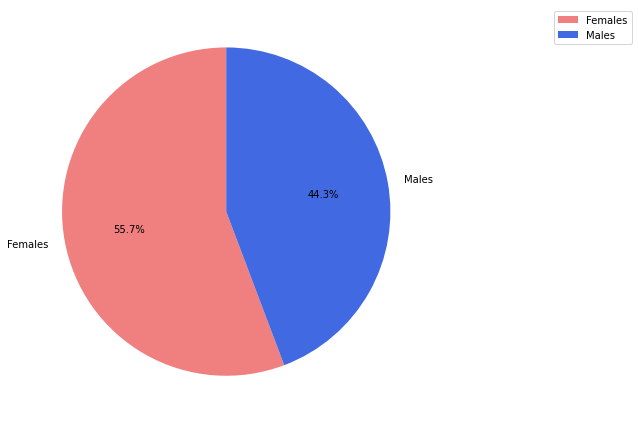

In [26]:
labels = ['Females', 'Males']
colors = ['lightcoral', 'royalblue']
fig, ax1 = plt.subplots(figsize = (13,6))
values = [len(data.loc[data['target'] == 0.0]), len(data.loc[data['target'] == 1.0])]
plt.pie(values, colors=colors, labels=labels, startangle=90, autopct='%.1f%%')
ax1.legend(labels, loc = 'upper right', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.tight_layout() 
plt.show()

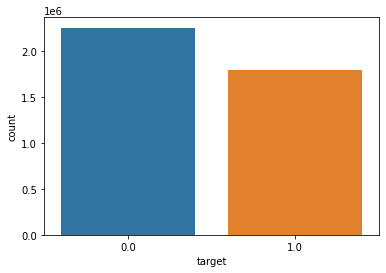

In [27]:
sns.countplot(x = data['target'], data = data)
plt.show()

**Задание 1.4** (0.5 балла) Продолжим с расределениями, теперь нам интересно посмотреть на самый редкие\популярные имена, фамиилии, отчества, потому что в дальнейшем эта информация может превратиться в полезные фичи.
В рамках этого задания постройте распрделение:
* имен
* фамилий
* отчеств

Выделите отдельно топ10 самых популярных\непопулярных имен, фамилий и отчеств. Если с выделением анти топа из 10 имен будут проблемы, то сформируйте набор всех имен, которые в наших данных встречаются ровно по 1 разу.
Соотносится ли он с вашими логическими суждениями?

Раздельно для обоих полов. Также напишите вывод, почему эти данные стоит смотреть раздельно

In [28]:
import collections
from collections import Counter

Было использовано в этой части ⬇️
- https://stackoverflow.com/questions/63018726/counter-and-plot-the-most-common-word-in-a-text
- https://stackoverflow.com/questions/4743035/how-to-get-the-least-common-element-in-a-list (для топ-10 непопулярных)

## Женщины

### Топ-10 популярных 

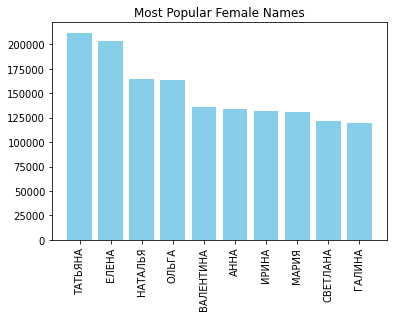

In [29]:
# имен
f_top_names = Counter(females['name']).most_common(10)
y = [count for name, count in f_top_names ]
x = [name for name, count in f_top_names ]
plt.bar(x, y, color='skyblue')
plt.xticks(rotation=90)
plt.title('Most Popular Female Names')
plt.show()

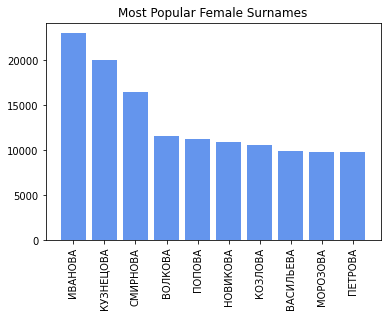

In [30]:
# фамилий
f_top_surnames = Counter(females['surname']).most_common(10)
y = [count for name, count in f_top_surnames ]
x = [name for name, count in f_top_surnames ]
plt.bar(x, y, color='cornflowerblue')
plt.xticks(rotation=90)
plt.title('Most Popular Female Surnames')
plt.show()

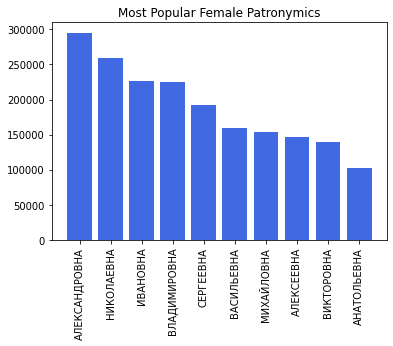

In [31]:
# отчеств
f_top_patronymic = Counter(females['patronymic']).most_common(10)
y = [count for name, count in f_top_patronymic ]
x = [name for name, count in f_top_patronymic ]
plt.bar(x, y, color='royalblue')
plt.xticks(rotation=90)
plt.title('Most Popular Female Patronymics')
plt.show()

### Топ-10 НЕпопулярных

In [32]:
# здесь все по 1 и график не сделает прочтение удобнее
c = collections.Counter(females['name'])
print('10 Least Popular Female Names: ')
c.most_common()[:-10-1:-1]

10 Least Popular Female Names: 


[('УВЕЙСИ', 1),
 ('АРНЕЛИЯ', 1),
 ('ЕВГЕГИЯ', 1),
 ('САФАРА', 1),
 ('ГУЛБАРНА', 1),
 ('ОЙШАХОН', 1),
 ('КАЗИМА', 1),
 ('АДИСАТ', 1),
 ('МЕДАН', 1),
 ('РОЕНА', 1)]

In [33]:
c = collections.Counter(females['surname'])
print('10 Least Popular Female Surames: ')
c.most_common()[:-10-1:-1]

10 Least Popular Female Surames: 


[('ХАНАФАЕВА', 1),
 ('ШАМИШИНА', 1),
 ('ДЕВЯТЛИЦКАЯ', 1),
 ('ШАМПЛЕТОВА', 1),
 ('КАЛОМИНА', 1),
 ('ЖАРГАЛОВА', 1),
 ('КАРАЧИНОВА', 1),
 ('ХИРНОВА', 1),
 ('ЩЕДУШНОВА', 1),
 ('МОЛОКАНОВ', 1)]

In [34]:
c = collections.Counter(females['patronymic'])
print('10 Least Popular Female Patronymics: ')
c.most_common()[:-10-1:-1]

10 Least Popular Female Patronymics: 


[('НАСБХАЛИЕВНА', 1),
 ('ЦЫБЕНОВНА', 1),
 ('СОМУИЛОВНА', 1),
 ('ДЖУЧИЕВНА', 1),
 ('ЗАВИНОВНА', 1),
 ('ВАЛЕРТЕВНА', 1),
 ('АНРЕЯНОВНА', 1),
 ('КАМАЛБАЕВНА', 1),
 ('НЕЛЯМОВНА', 1),
 ('КАНЫШЕВНА', 1)]

## Мужчины

### Топ-10 популярных

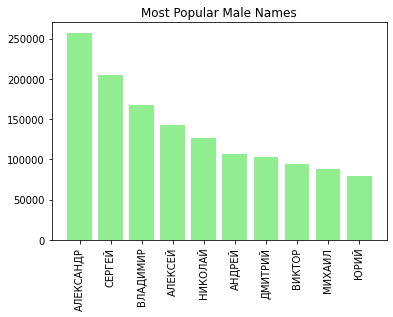

In [35]:
# имен
m_top_names = Counter(males['name']).most_common(10)
y = [count for name, count in m_top_names ]
x = [name for name, count in m_top_names ]
plt.bar(x, y, color='lightgreen')
plt.xticks(rotation=90)
plt.title('Most Popular Male Names')
plt.show()

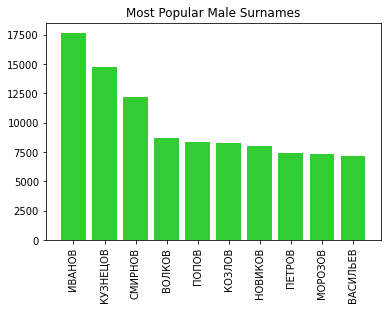

In [36]:
# фамилий
m_top_surnames = Counter(males['surname']).most_common(10)
y = [count for name, count in m_top_surnames ]
x = [name for name, count in m_top_surnames ]
plt.bar(x, y, color='limegreen')
plt.xticks(rotation=90)
plt.title('Most Popular Male Surnames')
plt.show()

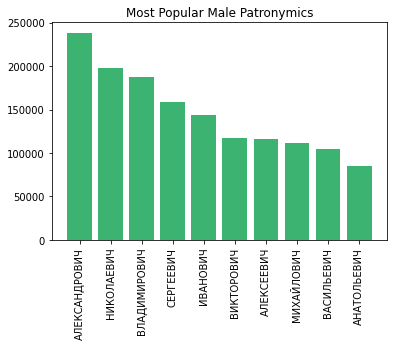

In [37]:
# отчеств
m_top_patronymic = Counter(males['patronymic']).most_common(10)
y = [count for name, count in m_top_patronymic ]
x = [name for name, count in m_top_patronymic ]
plt.bar(x, y, color='mediumseagreen')
plt.xticks(rotation=90)
plt.title('Most Popular Male Patronymics')
plt.show()

### Топ-10 НЕпопулярных

In [38]:
c = collections.Counter(males['name'])
print('10 Least Popular Male Names: ')
c.most_common()[:-10-1:-1]

10 Least Popular Male Names: 


[('БЕРЕК', 1),
 ('БИРКАН', 1),
 ('НМКОЛАЙ', 1),
 ('КУРГАНБАЙ', 1),
 ('НИКЛОАЙ', 1),
 ('АЛИАББОС', 1),
 ('РОВЕЧ', 1),
 ('МУБОРИЗИ', 1),
 ('МАСЕЛЬ', 1),
 ('ФАЙЗЛИДДИН', 1)]

In [39]:
c = collections.Counter(males['surname'])
print('10 Least Popular Male Surames: ')
c.most_common()[:-10-1:-1]

10 Least Popular Male Surames: 


[('ПЕРЕЩАЛОВ', 1),
 ('ПРИХОДЬКЬ', 1),
 ('КИРЮХА', 1),
 ('ЖЕВНЕРОВИЧ', 1),
 ('НОВАЛЬСКИЙ', 1),
 ('РАЗУМЕНКОВ', 1),
 ('ЛАРАРЕВ', 1),
 ('КАЙГУСУЗ', 1),
 ('СУМАНКОВ', 1),
 ('ЧЕЛОШКИН', 1)]

In [40]:
c = collections.Counter(males['patronymic'])
print('10 Least Popular Male Patronymics: ')
c.most_common()[:-10-1:-1]

10 Least Popular Male Patronymics: 


[('САНГИМАДОВИЧ', 1),
 ('ХОСИНОВИЧ', 1),
 ('ЕВГЕНЬВЕИЧ', 1),
 ('НЕДЖАТОВИЧ', 1),
 ('ИДИНОВИЧ', 1),
 ('УМАБИЕВИЧ', 1),
 ('УАХБЕЧАНОВИЧ', 1),
 ('АНАТОЛИЬЕВИЧ', 1),
 ('ФАНУНОВИЧ', 1),
 ('УРФАНОГЛЫ', 1)]

#### Данные стоит смотреть раздельно, поскольку 
1. % мужчин и женщин в датасете различается
2. Раз есть признак таргет, это два разных кластера, которые в пределах этого задания было бы очень странно перемешивать (разбиение помогает нам увидеть какие-то фичи, а что такой анализ даст без разделения данных не очень ясно)

## 2. Построение признаков (2 балла)

В рамках этого блока начнем рассматривать возможнве признаки, которые мы можем получить из ФИО для определения гендера.

Как вы догадываетесь, нам важно выделить из этих данных такие прзинаки, которые нам помогут отличать один гендер от другого. На этом подходе и будет базироваться наше понимание полезности того или иного признака в нашей модели.

**Задание 2.1** (1 балл) Поговорим о длинах имен, фамилий, и отчеств.

Это первое, что может прийти в голову в качестве выделения признака. Так как при белглом взгляде на тот же топ популярных имен (вы же сделали это задание? :) ) можно увидеть, что самые популярные мужские имена на 1-2 буквы длинее, чем женские. Вот проверкой такой гипотезы мы в этом пункте и займемся)

Постройте распределение длин имен мужчин и женщин отдельно. Желательно вывести два отдельных графика. Если наше предположение верно, то даже по величине "пристального взгляда" мы можем найти некоторые отличия в получившихся данных.

Верно ли наше предположение? Выведите дополнительно также графики с распределениями длин фамилий и отчеств.
Что можно сказать про эти пары графиков?

## Длины для топ-10 имен

### мужчины

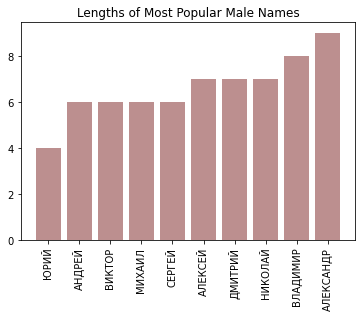

In [41]:
y = [len(name) for name, count in m_top_names ]
x = [name for name, count in m_top_names ]
# отсортируем для удобства сравнения
new_y, new_x = zip(*sorted(zip(y, x)))
plt.bar(new_x, new_y, color='rosybrown')
plt.xticks(rotation=90)
plt.title('Lengths of Most Popular Male Names')
plt.show()

In [42]:
import numpy as np
np.mean(y)

6.6

### Женщины

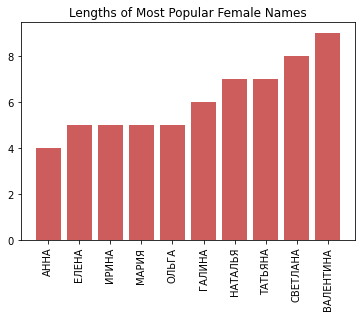

In [43]:
y = [len(name) for name, count in f_top_names ]
x = [name for name, count in f_top_names ]
new_y, new_x = zip(*sorted(zip(y, x)))
plt.bar(new_x, new_y, color='indianred')
plt.xticks(rotation=90)
plt.title('Lengths of Most Popular Female Names')
plt.show()

In [44]:
np.mean(y)

6.1

Мне было легче посмотреть по среднему, чем по графикам, но и на графиках тоже неплохо видны различия. У мужчин больше имен длиною в 6 букв, а у женщин в 5

## Длины для топ-10 фамилий

### Мужчины

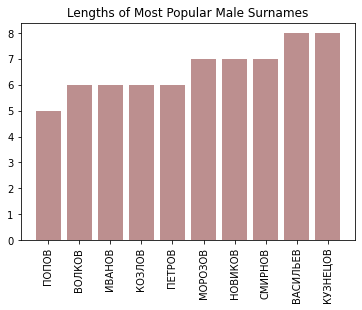

In [45]:
y = [len(name) for name, count in m_top_surnames ]
x = [name for name, count in m_top_surnames ]
new_y, new_x = zip(*sorted(zip(y, x)))
plt.bar(new_x, new_y, color='rosybrown')
plt.xticks(rotation=90)
plt.title('Lengths of Most Popular Male Surnames')
plt.show()

In [46]:
np.mean(y)  # забавно... для фамилий так же, как для имен

6.6

### Женщины

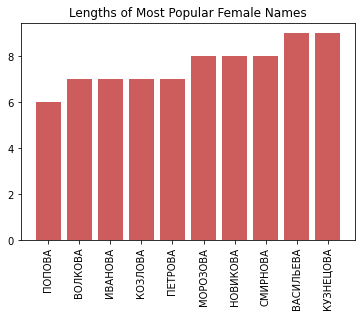

In [47]:
y = [len(name) for name, count in f_top_surnames ]
x = [name for name, count in f_top_surnames ]
new_y, new_x = zip(*sorted(zip(y, x)))
plt.bar(new_x, new_y, color='indianred')
plt.xticks(rotation=90)
plt.title('Lengths of Most Popular Female Names')
plt.show()

In [48]:
np.mean(y)

7.6

Здесь уже женские фамилии длиннее в среднем на 1! Логично, потому что обычно к женским фамилиям на конец добавляется -а

## Длины для топ-10 отчеств

### Мужчины

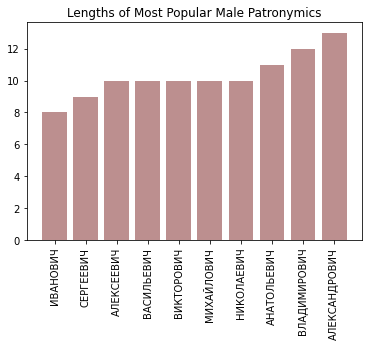

In [49]:
y = [len(name) for name, count in m_top_patronymic ]
x = [name for name, count in m_top_patronymic ]
new_y, new_x = zip(*sorted(zip(y, x)))
plt.bar(new_x, new_y, color='rosybrown')
plt.xticks(rotation=90)
plt.title('Lengths of Most Popular Male Patronymics')
plt.show()

In [50]:
np.mean(y)

10.3

### Женнщины

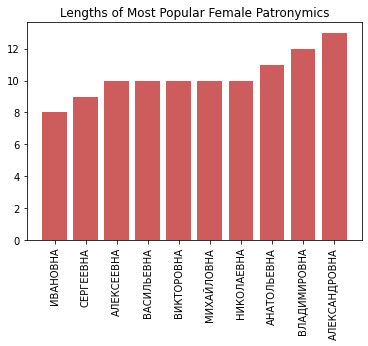

In [51]:
y = [len(name) for name, count in f_top_patronymic ]
x = [name for name, count in f_top_patronymic ]
new_y, new_x = zip(*sorted(zip(y, x)))
plt.bar(new_x, new_y, color='indianred')
plt.xticks(rotation=90)
plt.title('Lengths of Most Popular Female Patronymics')
plt.show()

In [52]:
np.mean(y)

10.3

Одинаково! Это не стоит использовать как признак (для разделения М и Ж)  (но в рамках дз по инструкции будем.. возможно различия не у самых частотных)

### Вывод по 2.1

*Предположение про имена оказалось верным, фамилии тоже можно использовать в качестве признака за счет разной длины, а вот длина отчества (в рамках 10 наиболее популярных) учтена не будет.*

**Задание 2.2** (1 балл) Конкретные буквы на конкретных позициях.

Знакомо вам это чувство, когда при знакомстве с новым человеком он обращает свое внимание на 2 последние буквы вашей фамилии, и после этого лингвистического анализа уже готов сделать предположение о вашей нацинональности?)

Конкретные примеры я опущу, т.к. у каждого они свои.

Забавно, но в нашей задаче такой подход также может оказаться полезным.

В этом задании проведите анализ того, на какие две последние буквы заканчиваются имена, фамилии и отчества мужчин и женщин.
Желательно эти данные также вывести на графики, для наглядности, я рекомендую юзать `pie` или `countplot`.


Что можно сказать по получившимся графикам? Имеют ли окончания имен мужчин и женщин сильные различия? Или же они сильно похожи и от этого сформированный нами признак будет бесполезен в нашей модели обучения?

# Имена

In [53]:
# https://stackoverflow.com/questions/34035427/conditional-removal-of-labels-in-matplotlib-pie-chart
# для нормального отображения циферок на графике
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 3 else ''

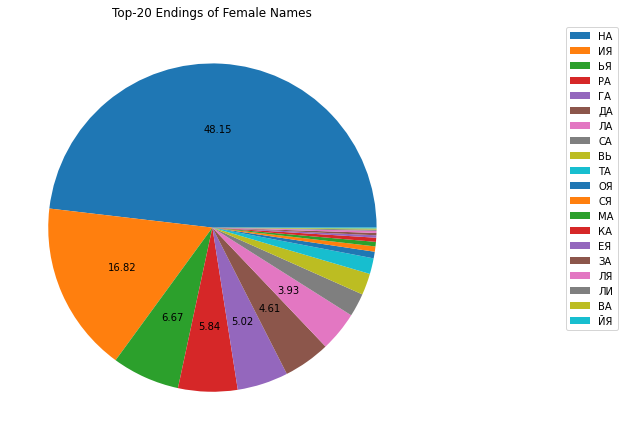

In [54]:
## (╮°.°)╮┳🍱🍱🍱🍵🍭🍭🍭┳ 

f_names_end = [ str(x)[-2:] for x in females['name']]  # все окончания
# 20 наиболее популярных окончаний (остальное нет смысла отображать на графике из-за оч малых %)
top_endings = Counter(f_names_end).most_common(20)  
values = [count for end, count in top_endings]
labels = [end for end, count in top_endings]
fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values,  autopct=my_autopct)
ax1.legend(labels, loc = 'upper right', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.tight_layout() 
plt.title("Top-20 Endings of Female Names")
plt.show()

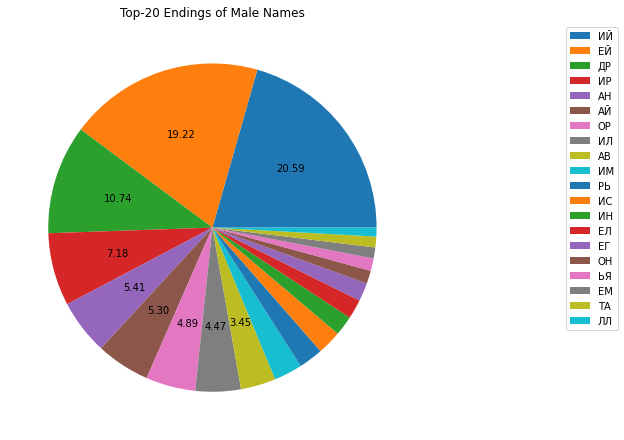

In [55]:
m_names_end = [ str(x)[-2:] for x in males['name']]  # все окончания
top_endings = Counter(m_names_end).most_common(20)  
values = [count for end, count in top_endings]
labels = [end for end, count in top_endings]
fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values,  autopct=my_autopct)
ax1.legend(labels, loc = 'upper right', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.tight_layout() 
plt.title("Top-20 Endings of Male Names")
plt.show()

**Окончания имен разные, это может быть признаком**

## Фамилии

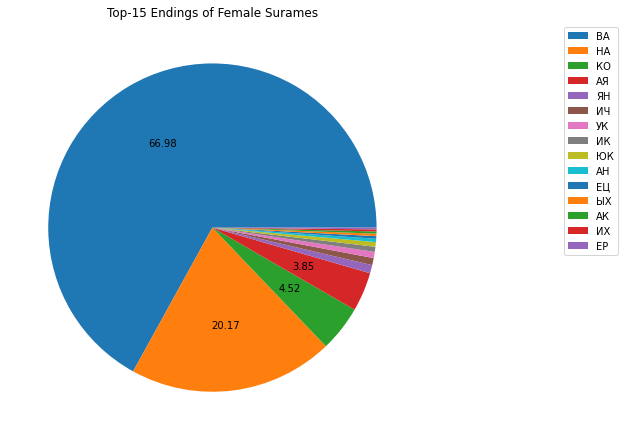

In [56]:
f_surnames_end = [ str(x)[-2:] for x in females['surname']]  # все окончания
# здесь возьмем 15, 20 многовато выходит и толком не видно
top_endings = Counter(f_surnames_end).most_common(15)  
values = [count for end, count in top_endings]
labels = [end for end, count in top_endings]
fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values,  autopct=my_autopct)
ax1.legend(labels, loc = 'upper right', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.tight_layout() 
plt.title("Top-15 Endings of Female Surames")
plt.show()

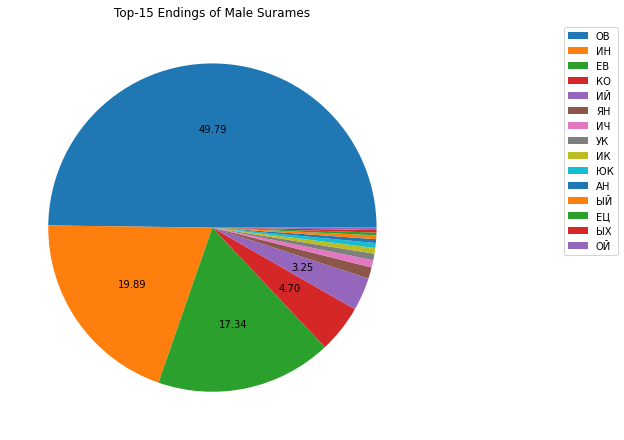

In [57]:
m_surnames_end = [ str(x)[-2:] for x in males['surname']]  # все окончания
top_endings = Counter(m_surnames_end).most_common(15)  
values = [count for end, count in top_endings]
labels = [end for end, count in top_endings]
fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values,  autopct=my_autopct)
ax1.legend(labels, loc = 'upper right', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.tight_layout() 
plt.title("Top-15 Endings of Male Surames")
plt.show()

**Также можно использовать как признак**

# Отчества

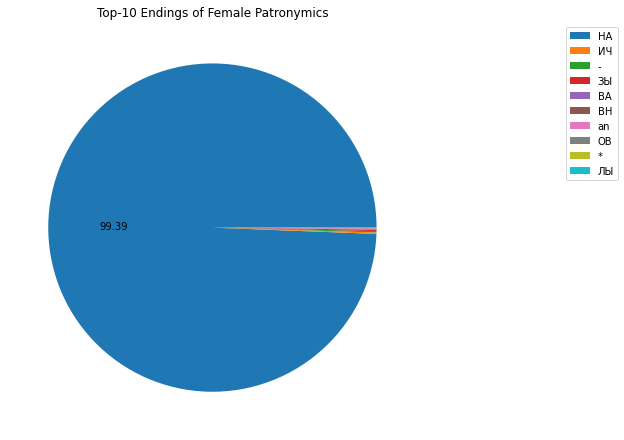

In [58]:
f_patronymic_end = [ str(x)[-2:] for x in females['patronymic']]  # все окончания
# Возьмем 10, тут преобладает одно окончание
top_endings = Counter(f_patronymic_end).most_common(10)  
values = [count for end, count in top_endings]
labels = [end for end, count in top_endings]
fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values,  autopct=my_autopct)
ax1.legend(labels, loc = 'upper right', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.tight_layout() 
plt.title("Top-10 Endings of Female Patronymics")
plt.show()

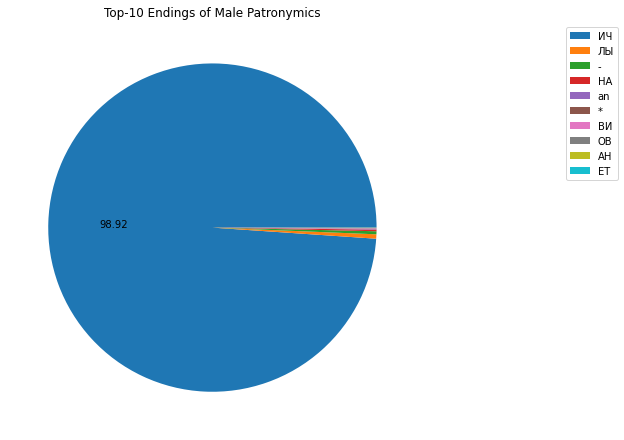

In [59]:
m_patronymic_end = [ str(x)[-2:] for x in males['patronymic']]  # все окончания
# Возьмем 10, тут преобладает одно окончание
top_endings = Counter(m_patronymic_end).most_common(10)  
values = [count for end, count in top_endings]
labels = [end for end, count in top_endings]
fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values,  autopct=my_autopct)
ax1.legend(labels, loc = 'upper right', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.tight_layout() 
plt.title("Top-10 Endings of Male Patronymics")
plt.show() 

**Иногда совпадает, но в преобладающем количестве случаев окончания отчеств разные. Тоже можно использовать как признак.**

Тут важно отметить, что мы лишь рассмотрели 2 подхода к формированию возможных признаков для наших моделей по ФИО. Понятное дело, что здесь еще целое поле для ваших экспериментов:
* Отношение числа согласных к общему числу букв в имени
* Выявление префиксов в фамилиях
* и что-то еще

Поэтому частью вашей домашки будет провести анализ других фич, которые вы сможете придумать и протестировать.

**Задание 2.3\***
Этим рекомендуется заниматься уже после построения моделей из следующего пункта.
Пайплайн к этой части задания такой:
* Вы описываете новую фичу, которую планируете добавить в данные.
* Объясняете её логику и вашу гипотезу.
* Далее добавляете её в свой набор данных для обучения и обучаете модель.
* Замеряете качество на отрезанных данных для валидации или вообще делаете супер крутую штуку и проводите кросс-валидацию (но тогда запаситесь терпением).

По полученным значениям метрики делаете вывод - принесла фича пользу в решении нашей задачи или нет.

## 3. Предобработка и построение моделей (2 балла)

Мы немного поработали с нашими данными и придумали пару фичей. Теперь дело за малым, провести предобработку данных для получения фич и использования этих данных для обучения модели.

Для начала поработаем с нашими ФИО:

**Задание 3.1** (0.5 балла) Удалите дубликаты строк из трейна, если еще не сделали этого ранее. И проведите некоторую работу с нашими текстовыми данными:
* приведите все слова к единому регистру (верхнему или нижнему)
* замените все буквы ё на е, т.к. их использование в тексте очень слабо детерминированно
* избавьтесь от строк, где в записях присутствуют буквы не из кириллицы. Поясните, почему эти данные нужно убрать из нашего трейна
* проведите самостоятельную разметку тех данных, у которых нет таргета. Там где это не можете сделать - данные удалите

Для удобства можете локально сохранить полученный файл, чтобы не запускать этот блок работ по многу раз

Использовалось:
- https://stackoverflow.com/questions/48996822/python-drop-rows-from-a-pandas-dataframe-that-contain-numbers

In [164]:
## (ﾉ◕ヮ◕)ﾉ*:･ﾟ✧
# все к верхнему реистру и замена Ё на Е
data['name'] = data['name'].str.upper().replace('Ё', 'Е')
data['surname'] = data['surname'].str.upper().replace('Ё', 'Е')
data['patronymic'] = data['patronymic'].str.upper().replace('Ё', 'Е')

In [165]:
# удалить строки, где есть буквы не из кириллицы
data = data[~data['surname'].str.contains(r'[a-zA-Z]')]
data = data[~data['name'].str.contains(r'[a-zA-Z]')]
data = data[~data['patronymic'].str.contains(r'[a-zA-Z]')]

Такие строки важно удалить, поскольку, например, была КАPПУНИНА, где р - это английское p)). Это может учитываться моделью как признак (наличие латинской буквы), хотя по сути им не является

In [166]:
# мне кажется, нужно еще почистить
data = data.replace(r'\n','', regex=True) 

In [167]:
data = data.replace(r'[!.,\\*-]','', regex=True) 

In [168]:
data = data.replace(r' ','', regex=True) 

In [169]:
data = data.replace(r"'","", regex=True) 

In [170]:
data = data.replace(r"[(]","", regex=True) 

In [171]:
data = data.replace(r"[)]","", regex=True) 

In [172]:
# данные без таргета я удалила в 1 пункте, тк их невозможно восстановить 
data.loc[data['target'].isnull()]

,Id,surname,name,patronymic,target


**Задание 3.2** (0.5 балла) От предобработанных данных из задания 3.1 сформируйте фичи, которые мы рассмторели в части 2. Их мы назовем базовыми)

Среди базовых фичей мы видим:
* последние две буквы имени
* послендие две буквы фамилии
* последние две буквы отчества
* длина каждого из элементов ФИО

Важно заметить, что первые 3 признака про последние две буквы это полностью категриальные признаки (надеюсь вы хорошо понимаете, что они из себя представляют), тогда как 3 следующих признака представляют из себя численный\вещественный набор данных. Между их обработками есть отличие и это важно понимать.
В рамках этого пункта вам надо выделить эти признаки в отдельную `pandas` табличку формата:

_id, feature1, feature2, feature3, ..., target_

на этом этапе мы можем уже отделить target в отдельный объект. Сделать это следует через инструменты того же pandas.

In [173]:
feature4 = [ len(str(x)) for x in data['name']]  # длины имен
feature5 = [ len(str(x)) for x in data['surname']]  # длины фамилий
feature6 = [ len(str(x)) for x in data['patronymic']]  # длины отчеств

In [174]:
feature1 = [ str(x)[-2:] if len(str(x)) > 3 else str(x)[-1:] for x in data['name']]  # все окончания имен
feature2 = [ str(x)[-2:] if len(str(x)) > 3 else str(x)[-1:] for x in data['surname']]  # все окончания фамилий
feature3 = [ str(x)[-2:] if len(str(x)) > 3 else str(x)[-1:] for x in data['patronymic']]  # все окончания отчеств

In [175]:
target = [ x for x in data['target']]

In [72]:
df = pd.DataFrame({
        'id': id_list,
        'feature1': feature1,
        'feature2': feature2,
        'feature3': feature3,
        'feature4': feature4,
        'feature5': feature5,
        'feature6': feature6,
        'target' : target
    })

In [73]:
df.head(5)

,id,feature1,feature2,feature3,feature4,feature5,feature6,target
0,2636471,НА,ВА,НА,5,7,9,0.0
1,165386,ОР,ИЧ,ИЧ,5,9,8,1.0
2,243807,ГА,ВА,НА,5,8,9,0.0
3,232582,ЕЙ,ОВ,ИЧ,6,7,12,1.0
4,3970023,РК,УК,ИЧ,4,8,9,1.0


In [74]:
train = df.loc[:, df.columns.drop(['id', 'target'])]
train.head(3)

,feature1,feature2,feature3,feature4,feature5,feature6
0,НА,ВА,НА,5,7,9
1,ОР,ИЧ,ИЧ,5,9,8
2,ГА,ВА,НА,5,8,9


In [75]:
target = df[['target']]
target.head(3)

,target
0,0.0
1,1.0
2,0.0


Перед следующим заданием мы попросим вас произвести дележ трейна на основную и валидационную часть, и только после этого заниматься обработкой признаков:

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train, target, test_size=0.2, random_state=1337)

**Задание 3.3** (0.5 балла) В рамках этого пункта нам нужно предобработать категориальные и численные фичи.
Для категориальных фичей мы можем использовать достаточно известный подход one-hot-encoding [про метод на уровне использования инфа есть тут](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html "тык"), а для вещественных величин мы будем использовать нормировку [инфа тут](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html "тут")

Весь процесс предобработки данных этими методами можно обернуть в удобную штуку pipeline, примеры исползьования которой есть здесь [ссылка 1](https://scikit-learn.org/stable/modules/compose.html#pipeline) и тут [ссылка 2](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py)

Так что в рамках этого пункта вам нужно заняться предобработкой фичей и получить на данном этапе такой набор данных, который мы уже будем готовы отправить в модель

Также важно обратить внимание, что валидационную выборку мы отделили до предобработки признаков. Подумайте, почему мы пошли на такой шаг. Как он должен повлиять на предобработку?

Наверное, это важно, чтобы тест не подходил слишком сильно к набору данных для обучения

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

In [78]:
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV


numeric_features = ["feature4", "feature5", "feature6"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["feature1", "feature2", "feature3"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

**Задание 3.4** (0.5 балла) Наконце-то мы дошли до нашего зоопарка с моделями!!!
Список того, что вам стоит рассмотреть, достаточно большой, а именно:
* Линейная регрессия
* Логистическая регрессия
* Деревья решений (DecisionTree)
* RandomForerst
* XGBoost
* LightGBM

Какие-то из этих подходов будут работать быстро, какие-то медленно, так что тут заранее стоит сказать, что вам придется запастись тепрпением.
Также на предыдущем этапе мы предобработали наши базовые фичи, поэтому теперь задача заключается в том, чтобы мы аккуратно поместили эти данные в наши модели и запустили в них обучение.

Пайплайн работы с каждой моделью такой:
* в выбранную модель загружаете предобработанные фичи и таргет
* для первого запуска можете не менять значения гиперпараметров а оставить дефолтными
* если все же меняете, то просьба текстом рядом указать: что меняете и почему
* запустить predict на обученной модели по отложенным данным для валидации
* посчитать roc_auc_score (нужная вам функция прописана в импорте)

И в конце этого пункта сделать вывод: почему та или иная модель дала хороший\плохой результат. Ваши предположения на этот счет.

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import roc_auc_score

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)
model1 = clf.fit(X_train, y_train)  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
print("LogisticRegression model score: %.9f" % roc_auc_score(y_valid, clf.decision_function(X_valid)))

LogisticRegression model score: 0.998258830


In [83]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)
clf.fit(X_train, y_train)

In [84]:
print("LinearRegression model score: %.9f" % roc_auc_score(y_valid, clf.predict(X_valid)))

LinearRegression model score: 0.998150826


In [85]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)
clf.fit(X_train, y_train)

In [86]:
print("DecisionTreeClassifier model score: %.9f" % roc_auc_score(y_valid, clf.predict(X_valid)))

DecisionTreeClassifier model score: 0.997024675


далее добавила n_estimators=10, > работало совсем сто лет(

In [87]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(n_estimators=10))]
)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_valid, y_valid))

/Users/mariadolgodvorova/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


model score: 0.997


In [88]:
print("RandomForestClassifier model score: %.9f" % roc_auc_score(y_valid, clf.predict(X_valid)))

RandomForestClassifier model score: 0.997246850


In [89]:
import lightgbm as lgb

In [90]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  lgb.LGBMClassifier())]
)
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['feature4', 'feature5',
                                                   'feature6']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['feature1', 'feature2',
                                                   'feature3'])])),
                ('classifier', LGBMClassifier())])

In [91]:
print(" LGBMClassifier model score: %.9f" % roc_auc_score(y_valid, clf.predict(X_valid)))

 LGBMClassifier model score: 0.997399235


In [90]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  XGBClassifier())]
)
clf.fit(X_train, y_train, classifier__eval_metric='auc')

/Users/mariadolgodvorova/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mariadolgodvorova/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [91]:
print(" XGBClassifier model score: %.9f" % roc_auc_score(y_valid, clf.predict(X_valid)))

 XGBClassifier model score: 0.997414426


Лучше всего сработала логистическая регрессия, которая как раз и предназначена для решения задач бинарной классификации. Правда я ожидала, что лучше будет decision tree

## 4. В погоне за кагглом (2 балла)

Теперь мы дошли до самого интересно. Как вы могли заметить, всю предыдщую работу мы выполняли с файлом `train.csv`, теперь настало время поработать с `test.csv`.

Как вы можете заметить, в тестовом файле у вас отсутствуют метки гендера. Поэтому перед вами стоит задача построить их предсказание, по имеющимся у вас уже обученным моделям и имеющимся данным на тесте.

Пайплайн работы с этим файлом можно описать следующим образом:
* Над `test.csv` выполняется вся та же предобработка, что и над трейном в части 3. отличие заключается только в том, что из теста вы не исключаете дубликаты!!! Т.к. в жизни возможна такая ситуация, когда вы будете предсказывать метку класса для одного и того же набора данных. Но вы также приводите буквы к одному регистру, заменяете "ё" на "е" и т.д.
* Формируете фичи по тестовым данным по таким же подходам, как делаи это в 3.2
* Предобрабатываете получившиеся признаки с помощью OHE и StandardScaler, как в 3.3
* После этого отправляете получившиеся данные на получение предсказания в ваши модели.


Отдельно стоит отметить, что для тестовых данных важно не потерять поле `Id`, т.к. на этом завязано сравнение ваших меток с истинными в тестирующей системе. Так что после того, как вы от модели получили предсказание на метки 1.0 и 0.0, вы совмещаете эти значения с полем `Id` и получившуюся табличку сохраняете локально на своем компьютере через `pandas`: `submission.to_csv('submission.csv', index=False)`

После берете получившийся файл и переходите на вкладку Submit Predictions на соревновании (картинка ниже).

После вы загружаете полученный файл в предложенный интерфейс и даете небольшое описание своим предсказаниям. После жмете кнопку Make Submission и дожидаетесь полученного результата.

В целом все, в данной домашке это конец истории. Почти...

In [92]:
test_data = pd.read_csv("test.csv")

In [93]:
test_data.head(2)

,Id,surname,name,patronymic
0,1189900,ШВАЛЕВА,ОЛЬГА,ИВАНОВНА
1,4860318,БОНДАРЕНКО,АЛСУ,РИШАТОВНА


In [94]:
test_data = test_data.fillna('') # там, где очистка, я заполнила оставшиеся "", поэтому тут для всех колонок

In [95]:
test_data['name'] = test_data['name'].str.upper().replace('Ё', 'Е')
test_data['surname'] = test_data['surname'].str.upper().replace('Ё', 'Е')
test_data['patronymic'] = test_data['patronymic'].str.upper().replace('Ё', 'Е')

test_data = test_data.replace(r'\n','', regex=True) 
test_data = test_data.replace(r'[!.,\\*-]','', regex=True) 
test_data = test_data.replace(r' ','', regex=True) 
test_data = test_data.replace(r"[(]","", regex=True)
test_data = test_data.replace(r"[)]","", regex=True) 

In [96]:
ids = [ x for x in test_data['Id']]
feat1 = [ str(x)[-2:] if len(str(x)) > 3 else str(x)[-1:] for x in test_data['name']]  # все окончания имен
feat2 = [ str(x)[-2:] if len(str(x)) > 3 else str(x)[-1:] for x in test_data['surname']]  # все окончания фамилий
feat3 = [ str(x)[-2:] if len(str(x)) > 3 else str(x)[-1:] for x in test_data['patronymic']]  # все окончания отчеств
feat4 = [ len(str(x)) for x in test_data['name']]  # длины имен
feat5 = [ len(str(x)) for x in test_data['surname']]  # длины фамилий
feat6 = [ len(str(x)) for x in test_data['patronymic']]  # длины отчеств

In [97]:
df1 = pd.DataFrame({
        'id': ids,
        'feature1': feat1,
        'feature2': feat2,
        'feature3': feat3,
        'feature4': feat4,
        'feature5': feat5,
        'feature6': feat6,
        
    })

In [98]:
numeric_features = ["feat4", "feat5", "feat6"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

cat_features = ["feat1", "feat2", "feat3"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features),
    ]
)

In [99]:
y_pred = model1.predict(df1)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [100]:
sub = pd.DataFrame({
        'id': ids,
        'target': y_pred,
        
    }).to_csv('my_submission.csv', index=False)

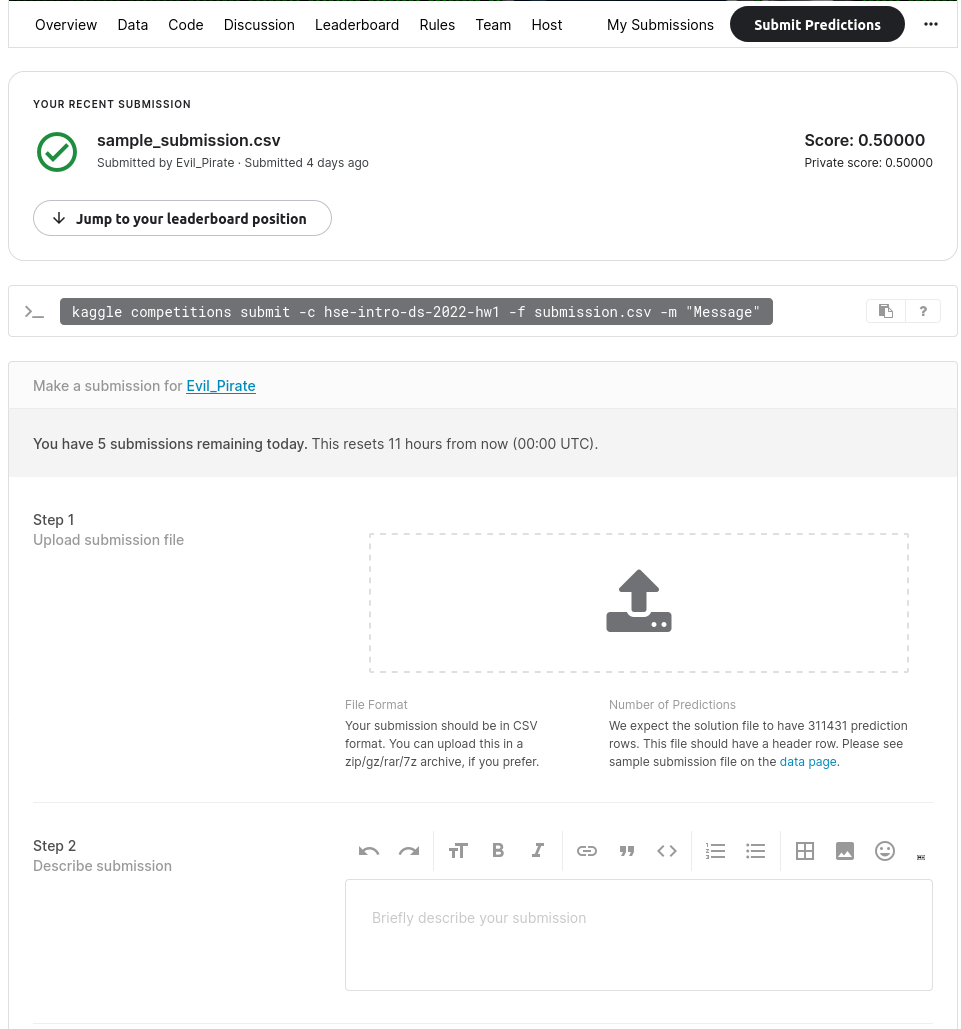

## 5. Ресерч. Буквально (2 балла)

Как и обещалось в задании 2.3, теперь перед вам стоит небольшая исследовательская работа по поиску более полезных признаков для решения нашей задачи. Пайплайн работы приблизительно описан там же.

Так что в этой части работы мы просим от вас фиксирование всех исследований новых признаков, с которыми вы решите работать. Также вы не ограничены в выборе моделей для обучения. Можете обучать все, а можете выбрать ту, которая понравилась лично вам. Только стоит дополнительно пояснить, почему вы остановили свой выбор на конкретной модели.

В рамках этой части работы мы ждем от вас исследования хотя бы двух признаков, за каждый из которых дадим по 1 баллу. Также возможен бонус, если найденные вами признаки дадут ощутимый прирост в качестве.

# 5.1 PyMorphy

В пайморфи есть тэг gender, можно его использовать как категориальный признак. Идея в том, что я запущу разметку на данных для мужчин и женщин, если большинство тегов gender будет верно для имени/ отчества/ фамилии, то оставляем этот признак соответственно и потом добавим во все данные.

In [101]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

## Имена

In [102]:
males_tag_names = [ morph.parse(str(x))[0].tag.gender for x in males['name']] 
Counter(males_tag_names)

Counter({'masc': 2565789, 'femn': 15711, None: 4550, 'neut': 1098})

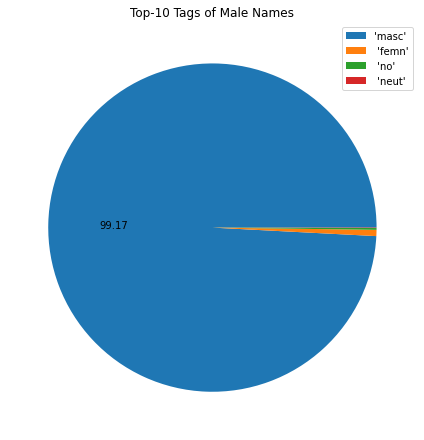

In [103]:
m_t = Counter(males_tag_names)
values = list(m_t.values())
label = []
m = list(m_t.keys())
# надо заменить None на no (уже сейчас для графика)
i = m.index(None)
label.append(m[:i]+['no']+m[i+1:])

fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values, autopct=my_autopct)
# тут была какая-то проблема и ошибка с граммемами
# поэтому оч странный вывод лейблов
ax1.legend(str(label).replace('[[', '').replace(']]', '').split(","))
plt.tight_layout() 
plt.title("Top-10 Tags of Male Names")
plt.show() 

In [104]:
female_tag_names = [ morph.parse(str(x))[0].tag.gender for x in females['name']] 
Counter(female_tag_names)

Counter({'femn': 3064376, 'masc': 257986, None: 5794, 'neut': 1865})

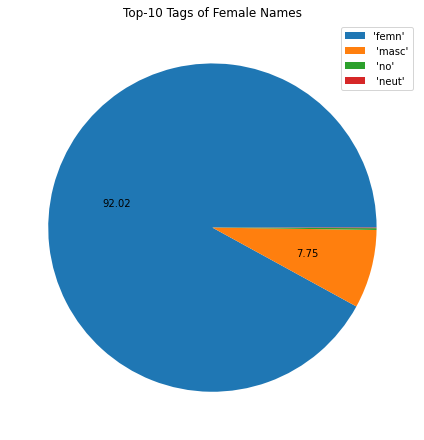

In [105]:
m_t = Counter(female_tag_names)
values = list(m_t.values())
label = []
m = list(m_t.keys())
i = m.index(None)
label.append(m[:i]+['no']+m[i+1:])

fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values, autopct=my_autopct)
ax1.legend(str(label).replace('[[', '').replace(']]', '').split(","))
plt.tight_layout() 
plt.title("Top-10 Tags of Female Names")
plt.show() 

**Это я возьму как признак. Для большинства случаев masc для мужчин и femn для женщин**

## Фамилии

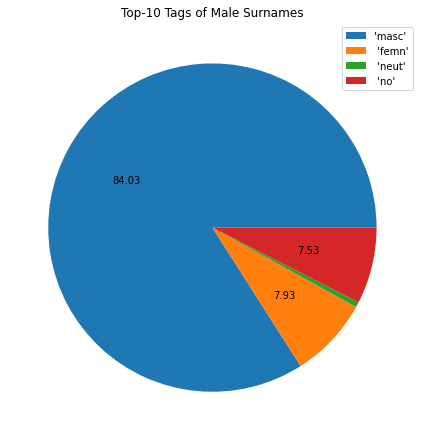

In [106]:
m_tag_surnames = [ morph.parse(str(x))[0].tag.gender for x in males['surname']] 
m_t = Counter(m_tag_surnames)
values = list(m_t.values())
label = []
m = list(m_t.keys())
i = m.index(None)
label.append(m[:i]+['no']+m[i+1:])

fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values, autopct=my_autopct)
ax1.legend(str(label).replace('[[', '').replace(']]', '').split(","))
plt.tight_layout() 
plt.title("Top-10 Tags of Male Surnames")
plt.show() 

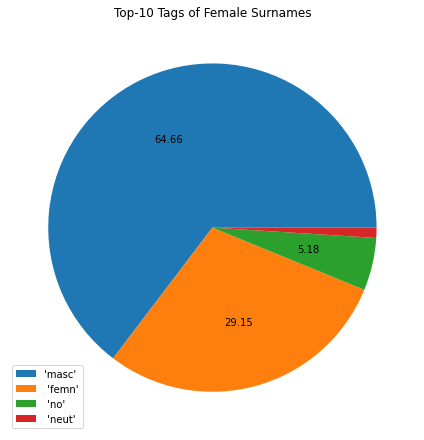

In [107]:
f_tag_surnames = [ morph.parse(str(x))[0].tag.gender for x in females['surname']] 
m_t = Counter(f_tag_surnames)
values = list(m_t.values())
label = []
m = list(m_t.keys())
i = m.index(None)
label.append(m[:i]+['no']+m[i+1:])

fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values, autopct=my_autopct)
ax1.legend(str(label).replace('[[', '').replace(']]', '').split(","))
plt.tight_layout() 
plt.title("Top-10 Tags of Female Surnames")
plt.show() 

**Немного неожиданно. Я думаю, обосновано фамилиями, которые не склоняются и имеют окончания типа КО- и тд. Это я в качестве признака брать не буду, тк род большей части женских фамилий определен неверно.**

## Отчества

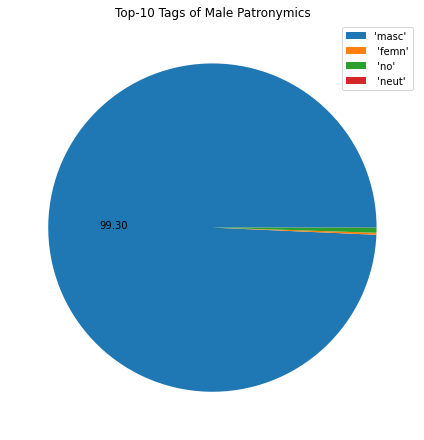

In [108]:
m_tag_surnames = [ morph.parse(str(x))[0].tag.gender for x in males['patronymic']] 
m_t = Counter(m_tag_surnames)
values = list(m_t.values())
label = []
m = list(m_t.keys())
i = m.index(None)
label.append(m[:i]+['no']+m[i+1:])

fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values, autopct=my_autopct)
ax1.legend(str(label).replace('[[', '').replace(']]', '').split(","))
plt.tight_layout() 
plt.title("Top-10 Tags of Male Patronymics")
plt.show() 

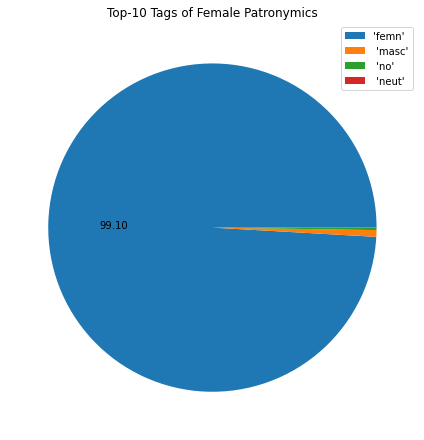

In [109]:
m_tag_surnames = [ morph.parse(str(x))[0].tag.gender for x in females['patronymic']] 
m_t = Counter(m_tag_surnames)
values = list(m_t.values())
label = []
m = list(m_t.keys())
i = m.index(None)
label.append(m[:i]+['no']+m[i+1:])

fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values, autopct=my_autopct)
ax1.legend(str(label).replace('[[', '').replace(']]', '').split(","))
plt.tight_layout() 
plt.title("Top-10 Tags of Female Patronymics")
plt.show() 

**С отчествами сработало, как ожидалось!🤠**

## Мини-вывод
В качестве фичей возьмем разметку по роду из пайморфи для имен и отчеств, поскольку полученные теги различаются для классов. А фамилии не возьмем, тк и там и там преобладает masc

# 5.1.1 Добавим признак и посмотрим, что вышло

In [202]:
feature7 = [ morph.parse(str(x))[0].tag.gender for x in data['name']]  # теги имен
feature8 = [morph.parse(str(x))[0].tag.gender for x in data['patronymic']]  # теги отчеств

In [203]:
target = [ x for x in data['target']]
df_with_morphy = pd.DataFrame({
        'id': id_list,
        'feature1': feature1,
        'feature2': feature2,
        'feature3': feature3,
        'feature4': feature4,
        'feature5': feature5,
        'feature6': feature6,
        'feature7': feature7,
        'feature8': feature8,
        'target' : target
    })

In [204]:
df_with_morphy.head(3)

,id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,2636471,НА,ВА,НА,5,7,9,femn,femn,0.0
1,165386,ОР,ИЧ,ИЧ,5,9,8,masc,masc,1.0
2,243807,ГА,ВА,НА,5,8,9,femn,femn,0.0


In [205]:
train_2 = df_with_morphy.loc[:, df_with_morphy.columns.drop(['id', 'target'])]
train_2.head(3)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,НА,ВА,НА,5,7,9,femn,femn
1,ОР,ИЧ,ИЧ,5,9,8,masc,masc
2,ГА,ВА,НА,5,8,9,femn,femn


In [206]:
target_2 = df_with_morphy['target']

In [207]:
X_train, X_valid, y_train, y_valid = train_test_split(train_2, target_2, test_size=0.2, random_state=1337)

In [208]:
numeric_features = ["feature4", "feature5", "feature6"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["feature1", "feature2", "feature3", "feature7", "feature8"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [209]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)
model_final = clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_valid, y_valid))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model score: 0.997


In [185]:
print("LogisticRegression model score: %.9f" % roc_auc_score(y_valid, clf.decision_function(X_valid)))

LogisticRegression model score: 0.998267220


Стало получше (было 0.998258830, это не много, но это честная работа..)

# 5.1.2

Раз мы посмотрели последние две буквы в качестве окончаний, можно попробовать посмотреть первые две

## Имена

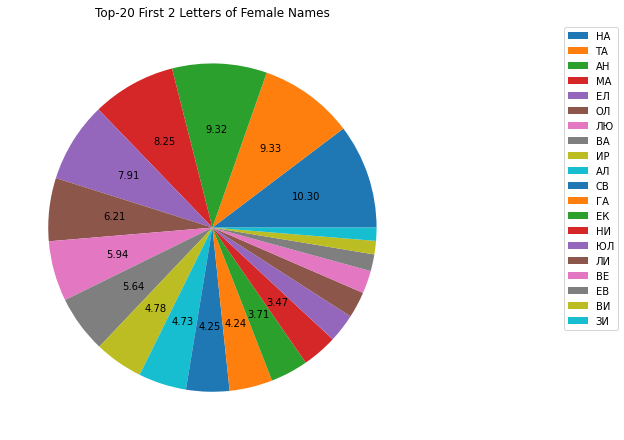

In [134]:
start_name = [ str(x)[0:2] if len(str(x)) > 1 else str(x)[0:1] for x in females['name']] 

top_start = Counter(start_name).most_common(20)  
values = [count for end, count in top_start]
labels = [end for end, count in top_start]
fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values,  autopct=my_autopct)
ax1.legend(labels, loc = 'upper right', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.tight_layout() 
plt.title("Top-20 First 2 Letters of Female Names")
plt.show() 

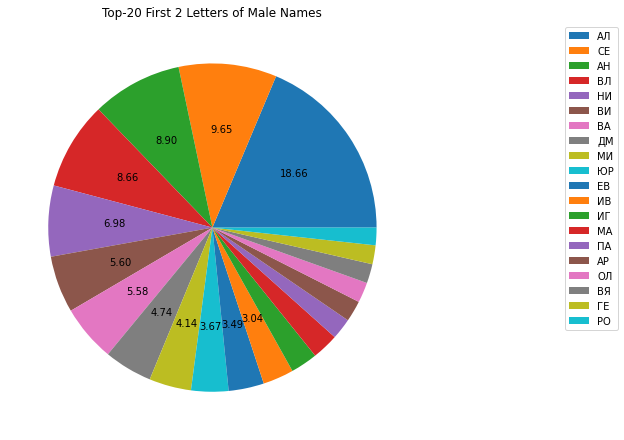

In [135]:
start_name = [ str(x)[0:2] if len(str(x)) > 1 else str(x)[0:1] for x in males['name']] 
top_start = Counter(start_name).most_common(20)  
values = [count for end, count in top_start]
labels = [end for end, count in top_start]
fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values,  autopct=my_autopct)
ax1.legend(labels, loc = 'upper right', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.tight_layout() 
plt.title("Top-20 First 2 Letters of Male Names")
plt.show() 

Различаются, возьмем за признак 

## Отчества и Фамилии

**Мне кажется нелогичным брать фамилии и отчества, тк они одинаковы для мужчин и женщин, но можно проверить тоже**

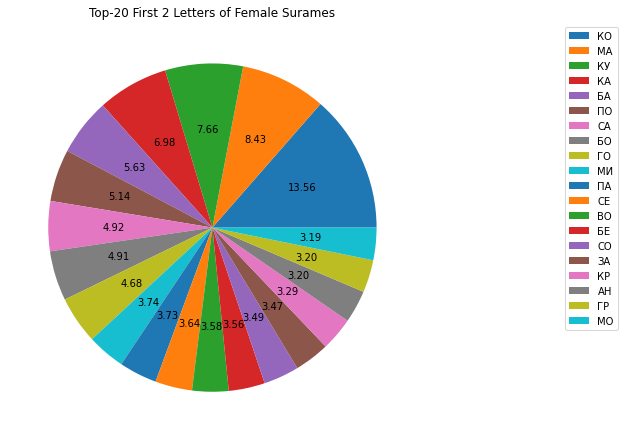

In [136]:
start_name = [ str(x)[0:2] if len(str(x)) > 1 else str(x)[0:1] for x in females['surname']] 

top_start = Counter(start_name).most_common(20)  
values = [count for end, count in top_start]
labels = [end for end, count in top_start]
fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values,  autopct=my_autopct)
ax1.legend(labels, loc = 'upper right', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.tight_layout() 
plt.title("Top-20 First 2 Letters of Female Surames")
plt.show() 

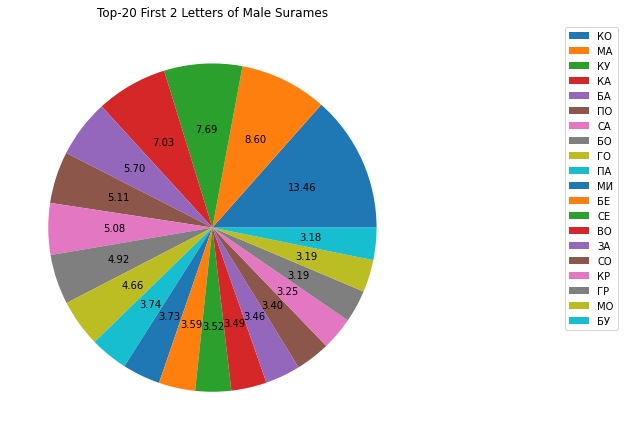

In [137]:
start_name = [ str(x)[0:2] if len(str(x)) > 1 else str(x)[0:1] for x in males['surname']] 

top_start = Counter(start_name).most_common(20)  
values = [count for end, count in top_start]
labels = [end for end, count in top_start]
fig, ax1 = plt.subplots(figsize = (13,6))
plt.pie(values,  autopct=my_autopct)
ax1.legend(labels, loc = 'upper right', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.tight_layout() 
plt.title("Top-20 First 2 Letters of Male Surames")
plt.show() 

Начала фамилий очень схожи, особенно самые частотные ко/ ма, не берем за признак. Отчества я так же не вижу смысла брать, даже если в обучающей выборке будут совсем различаться, то за этим нет логики - отчества мужчин и женщин одинаковые (ну, кроме окончаний)

In [199]:
feature9 = [ str(x)[0:2] if len(str(x)) > 1 else str(x)[0:1] for x in data['name']]   # первые две буквы имен

In [200]:
target = [ x for x in data['target']]

In [210]:
df_morphy_and_start = pd.DataFrame({
        'id': id_list,
        'feature1': feature1,
        'feature2': feature2,
        'feature3': feature3,
        'feature4': feature4,
        'feature5': feature5,
        'feature6': feature6,
        'feature7': feature7,
        'feature8': feature8,
        'feature9': feature9,
        'target' : target
    })

In [211]:
df_morphy_and_start.head(3)

,id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
0,2636471,НА,ВА,НА,5,7,9,femn,femn,ЕЛ,0.0
1,165386,ОР,ИЧ,ИЧ,5,9,8,masc,masc,ФЕ,1.0
2,243807,ГА,ВА,НА,5,8,9,femn,femn,ОЛ,0.0


In [212]:
train_2 = df_morphy_and_start.loc[:, df_morphy_and_start.columns.drop(['id', 'target'])]
train_2.head(3)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,НА,ВА,НА,5,7,9,femn,femn,ЕЛ
1,ОР,ИЧ,ИЧ,5,9,8,masc,masc,ФЕ
2,ГА,ВА,НА,5,8,9,femn,femn,ОЛ


In [213]:
target_2 = df_with_morphy['target']

In [214]:
X_train, X_valid, y_train, y_valid = train_test_split(train_2, target_2, test_size=0.2, random_state=1337)
numeric_features = ["feature4", "feature5", "feature6"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["feature1", "feature2", "feature3", "feature7", "feature8", "feature9"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [215]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)
model_best = clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_valid, y_valid))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model score: 0.997


In [216]:
print("LogisticRegression model score: %.9f" % roc_auc_score(y_valid, clf.decision_function(X_valid)))

LogisticRegression model score: 0.998284333


 Стало хуже.... было 0.998267220

# 5.2

Обучим модель, получим результат (без дополнительных фичей результат на кегле был 0.99813)
**Сначала с feature9, потом уберем ее тк ранее скор понизился и посмотрим, что скажет кеггл, мне просто интересно)**

In [217]:
ids = [ x for x in test_data['Id']]
feat1 = [ str(x)[-2:] if len(str(x)) > 3 else str(x)[-1:] for x in test_data['name']]  # все окончания имен
feat2 = [ str(x)[-2:] if len(str(x)) > 3 else str(x)[-1:] for x in test_data['surname']]  # все окончания фамилий
feat3 = [ str(x)[-2:] if len(str(x)) > 3 else str(x)[-1:] for x in test_data['patronymic']]  # все окончания отчеств
feat4 = [ len(str(x)) for x in test_data['name']]  # длины имен
feat5 = [ len(str(x)) for x in test_data['surname']]  # длины фамилий
feat6 = [ len(str(x)) for x in test_data['patronymic']]  # длины отчеств

In [218]:
feature7 = [ morph.parse(str(x))[0].tag.gender for x in test_data['name']]  # теги имен
feature8 = [morph.parse(str(x))[0].tag.gender for x in test_data['patronymic']]  # теги отчеств

In [219]:
feat9 = [ str(x)[0:2] if len(str(x)) > 1 else str(x)[0:1] for x in test_data['name']]

In [220]:
df1 = pd.DataFrame({
        'id': ids,
        'feature1': feat1,
        'feature2': feat2,
        'feature3': feat3,
        'feature4': feat4,
        'feature5': feat5,
        'feature6': feat6,
        'feature7': feature7,
        'feature8': feature8,
        'feature9': feat9
        
    })

In [222]:
numeric_features = ["feat4", "feat5", "feat6"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

cat_features = ["feat1", "feat2", "feat3", "feature7", "feature8", "feat9"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features),
    ]
)
y_pred = model_best.predict(df1)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [223]:
sub = pd.DataFrame({
        'id': ids,
        'target': y_pred,
        
    }).to_csv('my_best_submission.csv', index=False)

Результат кегла - 0.99820, с 10 на 6 место

##### убираем фичу 9 из модели (перезапустила ячейки до ее добавления)

In [188]:
feature7 = [ morph.parse(str(x))[0].tag.gender for x in test_data['name']]  # теги имен
feature8 = [morph.parse(str(x))[0].tag.gender for x in test_data['patronymic']]  # теги отчеств

In [189]:
df1 = pd.DataFrame({
        'id': ids,
        'feature1': feat1,
        'feature2': feat2,
        'feature3': feat3,
        'feature4': feat4,
        'feature5': feat5,
        'feature6': feat6,
        'feature7': feature7,
        'feature8': feature8
        
    })

In [191]:
numeric_features = ["feat4", "feat5", "feat6"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

cat_features = ["feat1", "feat2", "feat3", "feature7", "feature8"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features),
    ]
)
y_pred = model1.predict(df1)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [193]:
sub = pd.DataFrame({
        'id': ids,
        'target': y_pred,
        
    }).to_csv('mlast_submission.csv', index=False)

Скор стал ниже... а должен был быть по roc auc выше...(надежнее было кросс-валидацию делать)

# Вывод

Признаки с первыми двумя буквами именни и тегами по роду повысили качество. Просто с тегами качество тоже повысилось, но все вместе дало результат еще выше